In [1]:
matchId= '12007508'

In [2]:
import requests

params = {
    'matchId': matchId,
}

response = requests.get('https://www.sofascore.com/api/v1/event/'+ matchId +'/statistics', params)

In [3]:
data= response.json()

In [4]:
hteam= 'East Bengal FC'
ateam= 'Mohun Bagan SG'

In [5]:
stats = []

for period in data['statistics']:
    for group in period['groups']:
        for item in group['statisticsItems']:
            name = item.get('name')
            home_value = item.get('homeValue')
            away_value = item.get('awayValue')
            if name and home_value is not None and away_value is not None:
                stats.append({
                    'Stats': name,
                    hteam: home_value,
                    ateam: away_value
                })

In [6]:
import pandas as pd

In [7]:
Statistics= pd.DataFrame(stats)

In [8]:
Statistics.head(10)

,Stats,East Bengal FC,Mohun Bagan SG
0,Ball possession,52,48
1,Big chances,2,3
2,Total shots,11,15
3,Goalkeeper saves,2,3
4,Corner kicks,2,8
5,Fouls,12,14
6,Passes,405,360
7,Tackles,17,24
8,Free kicks,14,11
9,Yellow cards,6,3


In [9]:
import matplotlib.pyplot as plt

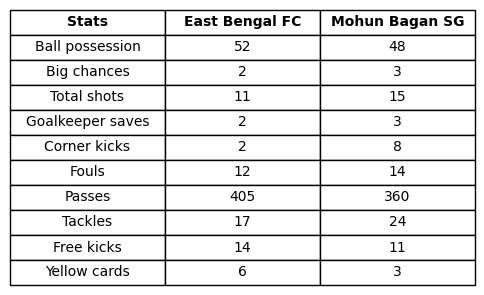

In [10]:
df = Statistics.head(10)

# Display the DataFrame as a beautiful table without the index
fig, ax = plt.subplots(figsize=(4, 3))
ax.axis('tight')
ax.axis('off')

# Create a table with pandas styling, excluding the index
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

# Set table styles
for key, cell in table.get_celld().items():
    cell.set_edgecolor('black')
    if key[0] == 0:  # Header row
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('White')
    else:  # Data rows
        cell.set_facecolor('white')
plt.savefig('Stats.png',dpi =300, bbox_inches='tight')
plt.show()